\author{Ahmadsho Akdodshoev}
\title{Control Theory [S22]}

# Task 1

Given a system:

<!-- A = 
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 n & -2 & -10/n & -2 \\
-5 & -n/10 & 0 & -3
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$

where $n$ is your number in your group list (ask your TA to give you your number if you don't have one).

$$\text{with } n = 5.$$

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 5 & -2 & -10/5 & -2 \\
-5 & -5/10 & 0 & -3
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$







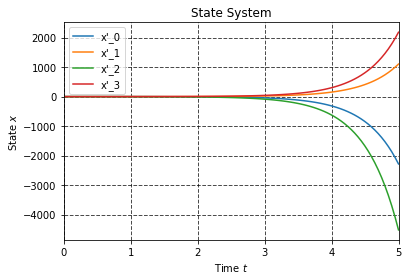

In [72]:
from matplotlib.pyplot import *
from scipy.integrate import odeint
import numpy as np

def StateSpace(x, t, A, B):
  B = np.reshape(B, x.shape)
  return np.dot(A,x)+B

def my_simulate(A, B):
  n = len(B)
  t0 = 0 # Initial time 
  tf = 5 # Final time
  t = np.linspace(t0, tf, 100) 

  x0 = np.zeros(n)

  solution = odeint(StateSpace, x0, t, args=(A,B))

  
  for i in range(0, len(B)):
    plot (t, solution[:,i], label=f'x\'_{i}')
  grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  grid(True)
  legend()
  title('State System')
  xlim([t0, tf])
  ylabel(r'State ${x}$')
  xlabel(r'Time $t$')
  show()

  
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [5, -2, -2, -2],
              [-5, -0.5, 0, -3]])

B = np.array([[0], [0], [-1], [1]])

my_simulate(A, B)

## Task 1.1

Find its transfer function representation $\dfrac{Y(s)}{U(s)} = W(s)$.


$$
\begin{cases}
sIX(s) = AX(s) + BU(s) \\
Y(s) = CX(s)
\end{cases}
$$

<!-- $$
\begin{cases}
  \dot{x}_1 = x_3 \\
  \dot{x}_2 = x_4 \\
  \dot{x}_3 = 5x_1 - 2x_2 - 2x_3 - 2x_4 \\ 
  \dot{x}_4 = -5x_1 - 0.5x_2 - 3x_4
\end{cases}
$$ -->

$$(sI - A)X(s) = BU(s)$$
$$X(s) = (sI-A)^{-1}BU(s)$$
$$Y(s) = C(sI-A)^{-1}BU(s)$$
$$\frac{Y(s)}{U(s)} = W(s) = C(sI-A)^{-1}B$$

$$ W(s) = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} 
\left(
\begin{bmatrix} 
s & 0 & -1 & 0 \\
0 & s & 0 & -1 \\
 -5 & 2 & s+2 & 2 \\
5 & 0.5 & 0 & s+3
\end{bmatrix}
\right)^{-1}
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix} 
$$

$$
(sI-A)^{-1}
=
-\frac{1}{-s^4-5s^3-1.5s^2+24s+12.5}
\begin{bmatrix}
s^3+5s^2+6.5s+1 & 2(s+2.5) & (s^2+3s+0.5) & -2(s+1) \\
-5(s+2) & (s^3+5s^2+s-25) & -5 & (s^2+2s-5) \\
5(s^2+5s+2.5) & -2(s^2+2.5x) & (s^3+3s^2+0.5s) & -2(s^2+s) \\
-5(s^2+2s) & -0.5(s^2+2s-25) & -5s & (s^3+2s^2-5s)
\end{bmatrix}
$$

$$W(s) = -\frac{(s^2+2s-5)-2(s+1)-(s^2+3s+0.5)+5}{-s^4-5s^3-1.5s^2+24s+12.5}$$

$$W(s) = -\frac{-3s-2.5}{-s^4-5s^3-1.5s^2+24s+12.5}$$

Answer:
$$W(s) = -\frac{3s+2.5}{s^4+5s^3+1.5s^2-24s-12.5}$$



## Task 1.2

Propose an ODE representation of the system.

In order to find the ODE form of the state space, let us consider the inverse Laplace of the output function:

- let us assume that $W(s)$ is equal to some fraction $N(s)/M(s)$, where $N$ and $M$ are known functions;
- it is known that $W(s) = Y(s)/U(s)$;
- so it can be said that
  $$Y(s)M(s) = U(s)N(s);$$
- let us take the laplace transorm of it
$$\mathcal{L}^{-1}\left(Y(s)M(s)\right)\vert_{t} = \mathcal{L}^{-1}\left(U(s)N(s)\right)\vert_{t};$$
- the ODE would be the result of the inverse Laplace transform.

Taking the transfer function into consideration

$$W(s) = \frac{Y(s)}{U(s)} = \frac{N(s)}{M(s)} = -\frac{3s+2.5}{s^4+5s^3+1.5s^2-24s-12.5} ,$$

$$-\mathcal{L}^{-1}\left(s^4Y(s)+5s^3Y(s)+1.5s^2Y(s)-24sY(s)-12.5Y(s)\right)\vert_{t} = \mathcal{L}^{-1}\left(3sU(s)+2.5U(s)\right)\vert_{t};$$

Answer:
$$12.5y + 24\dot y -1.5\ddot y - 5y^{(3)} - y^{(4)} = 2.5u + 3\dot u$$


## Task 1.3

Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.

Recalling that the cost function has a form
$$J = \int^{\infty}_0{(x^TQx + u^TRu)dt},$$
let us set state cost and input cost matrices as:

- $Q = I_{4\times 4}$;
- $R = 1$.

Let us solve this using algebraic Ricatti equation. The matrix $S$ is the algebraic Ricatti equation, it is calculated using numerical method, and the controller gain $K$ is equal to

$$K = R^{-1}B^TS$$

<!-- Let us first perform eigenvalue analysis on the original state system:

$$\det(A - \lambda I) = 0$$

$$\begin{bmatrix} 
- \lambda & 0 & 1 & 0 \\
0 & - \lambda & 0 & 1 \\
 5 & -2 & -10/5-\lambda & -2 \\
-5 & -5/10 & 0 & -3-\lambda
\end{bmatrix} = 0$$ -->

In [73]:
# from scipy.signal import place_poles
import scipy
from scipy import linalg
from scipy import signal

def lqr(A,B,Q,R):
  """Solve the continuous time lqr controller.
  
  dx/dt = A x + B u
  
  cost = integral x.T*Q*x + u.T*R*u
  """
  #ref Bertsekas, p.151
  
  #first, try to solve the ricatti equation
  S = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))
  
  #compute the LQR gain
  K = np.matrix(scipy.linalg.inv(R)*(B.T*S))
  
  eigVals, eigVecs = scipy.linalg.eig(A-B*K)
  
  return K, S, eigVals

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [5, -2, -2, -2],
              [-5, -0.5, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

Q = np.eye(4)

R = np.eye(1)


Lambda, V = np.linalg.eig(A)
print(f"Eigen values of original system:\n{Lambda}\n")

P = np.array([-1, -3.22+1.22j, -3.22-1.22j, -0.53])
pp = scipy.signal.place_poles(A, B, P)

K = pp.gain_matrix
Lambda, V = np.linalg.eig(A - B @ K)
print(f"Gain matrix for pole placement:\n{K}\n")
print(f"Eigen values after pole placement:\n{Lambda}\n")

K, S, Lambda = lqr(A,B,Q,R)

print(f"K = {K}")
print(f"A-BK = {A-B*K}")
print(f"Eigen values after LQR:\n{Lambda}\n")




Eigen values of original system:
[ 1.9794134 +0.j        -3.22415746+1.2228094j -3.22415746-1.2228094j
 -0.53109849+0.j       ]

Gain matrix for pole placement:
[[-7.5136416  1.640512  -1.8819488  1.0880512]]

Eigen values after pole placement:
[-3.22+1.22j -3.22-1.22j -1.  +0.j   -0.53+0.j  ]

K = [[-10.09901951   2.23285174  -2.64520332   1.53358226]]
A-BK = [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [-5.09901951  0.23285174 -4.64520332 -0.46641774]
 [ 5.09901951 -2.73285174  2.64520332 -4.53358226]]
Eigen values after LQR:
[-3.39262761+1.17724884j -3.39262761-1.17724884j -1.86290767+0.j
 -0.53062269+0.j        ]



With the given poles, the gain matrix $K$ of pole placement is equal to:
$$K = \begin{bmatrix}-7.5136416 & 1.640512 & -1.8819488 & 1.0880512\end{bmatrix}.$$ 

With the given cost matrices, the gain matrix $K$ of LQR is equal to:
$$K = \begin{bmatrix}-10.09901951 &  2.23285174 & -2.64520332 & 1.53358226
\end{bmatrix}.$$



## Task 1.4

Show stability of the closed-loop system via eigenvalue analysis.

### Original

The original eigenvalues of $A$:

- $\lambda_1 = 1.99$;
- $\lambda_2 = -3.22 + 1.22j$;
- $\lambda_3 = -3.22 - 1.22j$;
- $\lambda_4 = -0.53$.

### Pole placement

The proposed poles are:

- $\lambda_1 = -1$;
- $\lambda_2 = -3.22+1.22j$;
- $\lambda_3 = -3.22-1.22j$;
- $\lambda_4 = -0.53$.

The gain matrix for the proposed poles is: $$K = \begin{bmatrix}-7.5136416 & 1.640512 & -1.8819488 & 1.0880512\end{bmatrix}.$$ 

The eigenvalues after pole placement are:

- $\lambda_1 = -3.22+1.22j$;
- $\lambda_2 = -3.22-1.22j$;
- $\lambda_3 = -1.  +0.j$;
- $\lambda_4 = -0.53+0.j$.


### LQR

The gain matrix for the proposed LQR is: 

$$K = \begin{bmatrix}-10.09901951 &  2.23285174 & -2.64520332 & 1.53358226
\end{bmatrix}.$$

$$
A - BK =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-5.1 & 0.23 & -4.64 & -0.47 \\
5.1 & -2.73 &  2.64 & -4.53
\end{bmatrix}
$$

The eigenvalues of $A-BK$:

- $\lambda_1 = -3.39 + 1.18j$;
- $\lambda_2 = -3.39 - 1.18j$;
- $\lambda_3 = -1.86$;
- $\lambda_4 = -0.53$,


## Task 1.5

Find stability margins by analysing Bode diagram for the system.

$$W(s) = -\frac{3s+2.5}{s^4+5s^3+1.5s^2-24s-12.5}$$

$$W(s) = \frac{G(s)}{1+G(s)}$$

<!-- $$s = j\omega$$

$$W(j\omega) = -\frac{3j\omega+2.5}{(j\omega)^4+5(j\omega)^3+1.5(j\omega)^2-24(j\omega)-12.5}$$

$$W(j\omega) = -\frac{3j\omega+2.5}{\omega^4-5j\omega^3-1.5\omega^2-24j\omega-12.5}$$

$$W(j\omega) = -\frac{3j\omega+2.5}{\omega^4-1.5\omega^2-12.5-j\omega(5\omega^2-24)}$$

$$W(j\omega) = -\frac{3j\omega+2.5}{(\omega^2-4.36)(\omega^2+2.86)-j\omega(5\omega^2-24)}$$

$$W(j\omega) = -\frac{3j\omega+2.5}{(\omega^2-4.36)(\omega^2+2.86)-j\omega(5\omega^2-24)}\frac{(\omega^2-4.36)(\omega^2+2.86)+j\omega(5\omega^2-24)}{(\omega^2-4.36)(\omega^2+2.86)+j\omega(5\omega^2-24)}$$

$$W(j\omega) = -\frac{(3j\omega+2.5)((\omega^2-4.36)(\omega^2+2.86)+j\omega(5\omega^2-24))}{(\omega^2-4.36)^2(\omega^2+2.86)^2+j\omega^2(5\omega^2-24)^2}$$

$$W(j\omega) = -\frac{(3j\omega+2.5)(\omega^4-1.5\omega^2-12.5+j\omega(5\omega^2-24))}{(\omega^2-4.36)^2(\omega^2+2.86)^2+j\omega^2(5\omega^2-24)^2}$$

$$W(j\omega) = -\frac{15j^2w^4 - 72j^2w^2 + 3jw^5 + 8jw^3 - 97.5jw +2.5w^4 - 3.75w^2 - 31.25}{(\omega^2-4.36)^2(\omega^2+2.86)^2+j\omega^2(5\omega^2-24)^2}$$

$$W(j\omega) = -\frac{-15w^4 + 72w^2 + 3jw^5 + 8jw^3 - 97.5jw +2.5w^4 - 3.75w^2 - 31.25}{(\omega^2-4.36)^2(\omega^2+2.86)^2+j\omega^2(5\omega^2-24)^2}$$

Final:

$$W(j\omega) = -\frac{-12.5w^4 + 68.25w^2 - 31.25}{(\omega^2-4.36)^2(\omega^2+2.86)^2+j\omega^2(5\omega^2-24)^2} + j\frac{3w^5+ 8w^3 - 97.5w}{(\omega^2-4.36)^2(\omega^2+2.86)^2+j\omega^2(5\omega^2-24)^2}$$

$$
\begin{cases}
\alpha(\omega) = \sqrt{}
\end{cases}
$$ -->

/home/yy7/.local/lib/python3.9/site-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


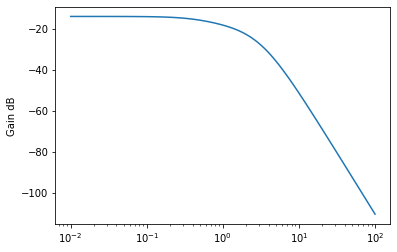

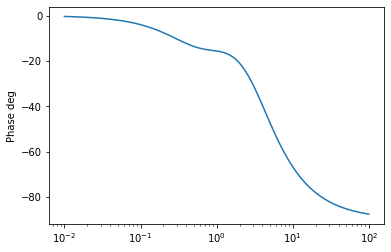

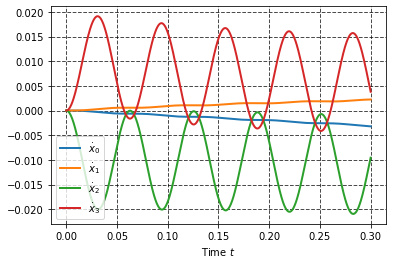

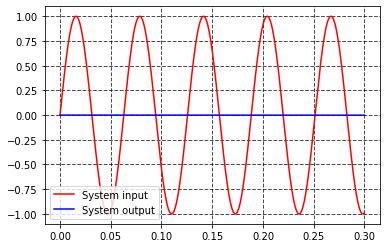

In [74]:
from scipy import signal
from scipy.signal import ss2tf

def Harmonic_control_signal(w,t):
  u = np.sin(w*t)
  return np.array([u])

def StateSpace(x, t, A, B, w):
  u = Harmonic_control_signal(w,t)
  x = np.dot(A,x)+np.dot(B,u)
  return x

def Control_system(A, B, C, D, w):
  x0 = np.zeros(len(B))

  t0 = 0 # Initial time 
  tf = 1/w*30 # Final time
  # tf = 1
  t = np.linspace(t0, tf, 10000) 
  solution = odeint(StateSpace, x0, t, args=(A,B,w))
  u = Harmonic_control_signal(w,t)
  y = np.dot(C,solution.T)+np.dot(D,u)
  
  return t, np.reshape(u,t.shape), np.reshape(y,t.shape), solution

num = [3, 2.5]
den = [1, 5, 1.5, -25, -12.5]

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [5, -2, -2, -2],
              [-5, -0.5, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

C = np.array([[1, 1, 0, 0]])

D = np.array([[0]])

W = ss2tf(A, B, C, D)

sys = signal.TransferFunction(W[0], W[1])

w, mag, phase = signal.bode(sys)

figure()
semilogx(w, mag)    # Bode magnitude plot
ylabel("Gain dB")
figure()
semilogx(w, phase)  # Bode phase plot
ylabel("Phase deg")
show()

# w_des = w[np.argmax(mag)]
w_des = 100
t, u, y, x = Control_system(A, B, C, D, w_des)

plot(t, x[:,0], linewidth=2.0, label = r"${\dot{x}_0}$")
plot(t, x[:,1], linewidth=2.0, label = r"${\dot{x}_1}$")
plot(t, x[:,2], linewidth=2.0, label = r"${\dot{x}_2}$")
plot(t, x[:,3], linewidth=2.0, label = r"${\dot{x}_3}$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $t$')
legend()
show()

plot(t, u, color = "red", label = "System input")
plot(t, y, color = "blue", label = "System output")
legend()
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
show()



Answer:

1. Definitions:
    - The phase crossover frequency, $w_{pc}$, is the frequency where  phase shift is equal to $-180^o$.
    - The gain crossover frequency, $w_{gc}$, is the frequency where the amplitude ratio is $1$, or when log modulus is equal to $0$.
1. Stability Criterion:
    - If at the phase crossover frequency, the corresponding log modulus of $G(iw_{pc})$ is less than $0\text{ dB}$, then the feedback system is stable. 
1. Stability Margins:
    - Gain Margin:   Let $x = |G(iw_{pc})|$ then the gain margin is given by $GM = 1/x$.
    - Phase Margin:   Let $q = arg(G(iw_{gc}))$ then the phase margin is given by $PM = 180^o + q$.


The phase is never turned to $-180\text{ deg}$ in the domain, so nothing can be said about the crossover frequency.

The amplitude is never $0$ in the domain, so nothing can be said about the gain crossover frequency.

Thus, the stability margins of the Bode plot cannot be analyzed on the domain.

## Task 1.6

Simulate closed-loop system.

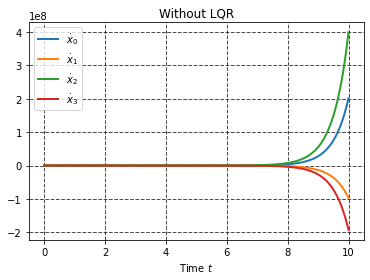

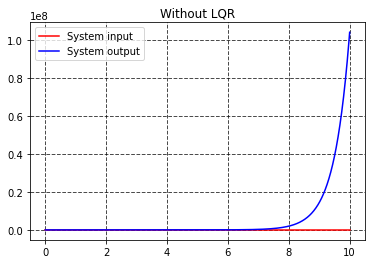

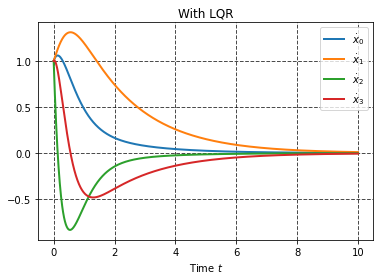

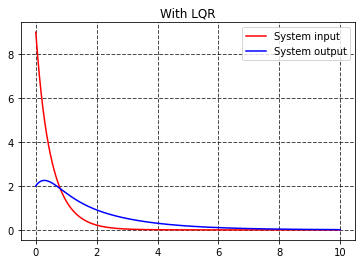

In [75]:
def StateSpace(x, t, A, B, K):
  x = np.dot(A,x) - np.dot(B*K, x)
  return x

def Control_system(A, B, C, D, K):
  x0 = np.ones(len(B))

  t0 = 0 # Initial time 
  tf = 10 # Final time
  t = np.linspace(t0, tf, 1000) 
  
  solution = odeint(StateSpace, x0, t, args=(A,B,K))

  u = -np.dot(K, solution.T)
  y = np.dot(C,solution.T)+np.dot(D,u)

  return t, np.reshape(u, t.shape), np.reshape(y,t.shape), solution


A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [5, -2, -2, -2],
              [-5, -0.5, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])
C = np.array([[1, 1, 0, 0]])
D = np.array([[0]])

# WITHOUT LQR

K = np.array([[0, 0, 0, 0]])

t, u, y, x = Control_system(A, B, C, D, K)

plot(t, x[:,0], linewidth=2.0, label = r"${\dot{x}_0}$")
plot(t, x[:,1], linewidth=2.0, label = r"${\dot{x}_1}$")
plot(t, x[:,2], linewidth=2.0, label = r"${\dot{x}_2}$")
plot(t, x[:,3], linewidth=2.0, label = r"${\dot{x}_3}$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $t$')
legend()
title('Without LQR')
show()

plot(t, u, color = "red", label = "System input")
plot(t, y, color = "blue", label = "System output")
legend()
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
title('Without LQR')
show()

# WITH LQR

Q = np.eye(4)
R = np.eye(1)
K, S, Lambda = lqr(A,B,Q,R)
K = np.array(K)

t, u, y, x = Control_system(A, B, C, D, K)

plot(t, x[:,0], linewidth=2.0, label = r"${\dot{x}_0}$")
plot(t, x[:,1], linewidth=2.0, label = r"${\dot{x}_1}$")
plot(t, x[:,2], linewidth=2.0, label = r"${\dot{x}_2}$")
plot(t, x[:,3], linewidth=2.0, label = r"${\dot{x}_3}$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $t$')
legend()
title('With LQR')
show()

plot(t, u, color = "red", label = "System input")
plot(t, y, color = "blue", label = "System output")
legend()
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
title('With LQR')
show()


## Task 1.7 

Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix} 
(2+0.1n)/(n-5) \\
1 \\
0 \\
0 
\end{bmatrix}.$ 

Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.

Since $n=5$, let us change it to $n = 30$ so the state of the system will converge to
$$x_0 = 
\begin{bmatrix} 
0.2 \\
1 \\
0 \\
0 
\end{bmatrix}.$$

The convergence of the initial system with matrix $A$ with $n=5$ to $x_0$ is not guaranteed, so let us change the arguments in the matrix $A$ as well

$$\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 30 & -2 & -10/30 & -2 \\
-5 & -30/10 & 0 & -3
\end{bmatrix}$$

If the system asymptotically approaches $x_0$ then
$$\bar 0 = Ax_0 + Bu$$
$$Ax_0 = -Bu$$
$$
\begin{bmatrix} 
0 \\
0 \\
\dfrac{0.1n^2+2n}{n-5} - 2 \\
\dfrac{-0.5n-10}{n-5} - \dfrac{n}{10}
\end{bmatrix}
=
\begin{bmatrix} 
0 \\
0 \\
u\\
-u
\end{bmatrix}
$$
From here the following identity should be true
$$
\dfrac{0.1n^2+2n}{n-5} - 2 = -\dfrac{-0.5n-10}{n-5} + \dfrac{n}{10}
$$
let us multiply both sides of the equation by $10n-50$, with $n \ne 5$
$$
n^2 + 20n - 20n + 100 = n^2 -5n +5n +100
$$
It follows that
$$n^2 + 100 = n^2 + 100$$

Thus, with some control $u$ the system converges to $x_0$ with $n\in R \backslash  \{5\}$.

Let us use error dynamics to find the control law:
$$\dot x = Ax + B(-K(x-x^*) + u^*),$$
where 
$$u^* = -B^+Ax^* \text{ with } \dot x^* = 0.$$
So the control is equal to
$$\dot x = Ax + B(-K(x-x^*) -B^+Ax^*),$$
$$u = -K(x-x^*) -B^+Ax^*$$

Error dynamics 

$$e = x - x^*$$
$$\dot e = Ae + B(u-u^*)$$
$$u-u^* = -Ke$$

u* = [4.]


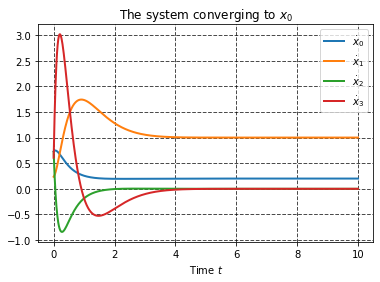

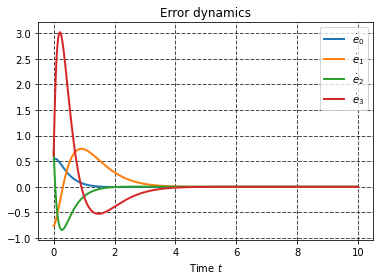

In [85]:
def StateSpace(x, t, A, B, K, x_star, u_star):
  x = np.dot(A,x) + np.dot(B, - np.dot(K,x-x_star) + u_star) 
  return x

def StateSpaceErr(e, t, A, B, K):
  e = np.dot(A,e) + np.dot(B, -K @ e) 
  return e

def Control_system(A, B, K,  x_star, u_star):
  x0 = np.random.random(4)
  e0 = x0 - x_star

  t0 = 0 # Initial time 
  tf = 10 # Final time
  t = np.linspace(t0, tf, 1000) 
  
  solution = odeint(StateSpace, x0, t, args=(A, B, K, x_star, u_star))
  error = odeint(StateSpaceErr, e0, t, args=(A, B, K))

  return t, solution, error


A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [30, -2, -10/30, -2],
              [-5, -30/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

C = np.array([[1, 1, 0, 0]])

D = np.array([[0]])

Q = np.eye(4)
R = np.eye(1)
K, S, Lambda = lqr(A,B,Q,R)
K = np.array(K)

# print(f"K = {K}")

x_star = np.array([0.2, 1, 0, 0])
u_star = - np.dot(np.linalg.pinv(B), np.dot(A, x_star))

print(f"u* = {u_star}")

t, x, e = Control_system(A, B, K,  x_star, u_star)

plot(t, x[:,0], linewidth=2.0, label = r"${\dot{x}_0}$")
plot(t, x[:,1], linewidth=2.0, label = r"${\dot{x}_1}$")
plot(t, x[:,2], linewidth=2.0, label = r"${\dot{x}_2}$")
plot(t, x[:,3], linewidth=2.0, label = r"${\dot{x}_3}$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $t$')
legend()
title(r'The system converging to $x_0$')
show()

plot(t, e[:,0], linewidth=2.0, label = r"${\dot{e}_0}$")
plot(t, e[:,1], linewidth=2.0, label = r"${\dot{e}_1}$")
plot(t, e[:,2], linewidth=2.0, label = r"${\dot{e}_2}$")
plot(t, e[:,3], linewidth=2.0, label = r"${\dot{e}_3}$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $t$')
legend()
title('Error dynamics')
show()

## Task 1.8

Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dynamics.

Let us apply Zero order hold with setting $n$ back to $n=5$:

$$x_{i+1} = \bar Ax_i + \bar Bu_i$$
$$\bar A = A \Delta t + I$$
$$\bar A = 
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
 5 & -2 & 1-0.01\cdot 10/5 & -2 \\
-5 & -5/10 & 0 & 1-0.01\cdot 3
\end{bmatrix}
$$

$$\bar B = B \Delta t$$
$$
\bar B = 0.01\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
$$


Answer:
$$x_{i+1} = 0.01
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
 5 & -2 & 1-0.01\cdot 10/5 & -2 \\
-5 & -5/10 & 0 & 1-0.01\cdot 3
\end{bmatrix}
x_i 
+ 0.01\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
u_i
$$


## Task 1.9

Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).

$$Q = I_{4\times 4}$$
$$R = 1$$

$$K_d = \begin{bmatrix}
-51.87807422 & 2.01879433 & -9.07421766 &  2.32182121
\end{bmatrix}
$$

In [ ]:
from scipy.signal import place_poles
import control

def lqr(A,B,Q,R):
  """Solve the continuous time lqr controller.
  
  dx/dt = A x + B u
  
  cost = integral x.T*Q*x + u.T*R*u
  """
  #ref Bertsekas, p.151
  
  #first, try to solve the ricatti equation
  S = np.matrix(scipy.linalg.solve_discrete_are(A, B, Q, R))
  
  #compute the LQR gain
  K = np.matrix(scipy.linalg.inv(R)*(B.T*S))
  
  eigVals, eigVecs = scipy.linalg.eig(A-B*K)
  
  return K, S, eigVals

T = 0.01

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [30, -2, -10/30, -2],
              [-5, -30/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

A_d = np.eye(4) + T * A
B_d = T * B


P = np.array([-0.7, -0.5, -0.2, 0])
pp = scipy.signal.place_poles(A_d, B_d, P)

K_pp = pp.gain_matrix
Lambda, V = np.linalg.eig(A_d - B_d @ K_pp)

print(f"Gain matrix K using pole placement:\n{K_pp}\n")

Q = np.eye(4)
R = np.eye(1)
K, S, Lambda = lqr(A_d,B_d,Q,R)

K = np.array(K)
print(f"Gain matrix K using LQR:\n{K}\n")


Gain matrix K using pole placement:
[[-24865693.0851581   -7266865.31848015   3748088.71197533
    3748625.37864116]]

Gain matrix K using LQR:
[[-51.87807422   2.01879433  -9.07421766   2.32182121]]



Gain matrix K using pole placement:

$$K = \begin{bmatrix}-24865693.0851581 & -7266865.31848015 & 3748088.71197533 & 3748625.37864116\end{bmatrix}$$

Gain matrix K using LQR:

$$K = \begin{bmatrix}-51.87807422 & 2.01879433 & -9.07421766 & 2.32182121\end{bmatrix}$$


## Task 1.10

Show eigenvalue analysis of the closed-loop dynamics of the discrete system (with the proposed discrete control law). Demonstrate stability.

In [ ]:
Lambda, Q = np.linalg.eig(A_d)
print(f"Eigenvalues of original system:\n{Lambda}\n")

Lambda, Q = np.linalg.eig(A_d-np.dot(B_d, K_pp))
print(f"Eigenvalues of the system using pole placement:\n{Lambda}\n")

Lambda, Q = np.linalg.eig(A_d-np.dot(B_d, K))
print(f"Eigenvalues of the system using LQR:\n{Lambda}\n")

Eigenvalues of original system:
[1.05432059+0.j         0.94612011+0.j         0.98311298+0.00751666j
 0.98311298-0.00751666j]

Eigenvalues of the system using pole placement:
[-7.00190390e-01 -4.99602946e-01 -2.00324242e-01  1.17585854e-04]

Eigenvalues of the system using LQR:
[0.9825813 +0.00659669j 0.9825813 -0.00659669j 0.93907826+0.j
 0.94846541+0.j        ]



Eigenvalues of the original system:

- $\lambda_1 = 1.05432059+0.j$
- $\lambda_2 = 0.94612011+0.j$
- $\lambda_3 = 0.98311298+0.00751666j$
- $\lambda_4 = 0.98311298-0.00751666j$

Eigenvalues of the system using pole placement:

- $\lambda_1 = -7.00190390 \times 10^{-1}$
- $\lambda_2 = -4.99602946 \times 10^{-1}$
- $\lambda_3 = -2.00324242 \times 10^{-1}$
- $\lambda_4 = 1.17585854 \times 10^{-4}$

   

Eigenvalues of the system using LQR:

- $\lambda_1 = 0.9825813 +0.00659669j$
- $\lambda_2 = 0.9825813 -0.00659669j$
- $\lambda_3 = 0.93907826+0.j$
- $\lambda_4 = 0.94846541+0.j$

## Task 1.11

Simulate the discrete system. Show graphs.

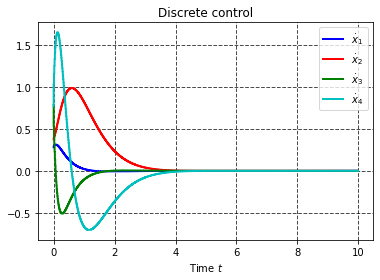

In [ ]:
from numpy import random

x_d = np.random.random(4)
x_disc = x_d

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [30, -2, -10/30, -2],
              [-5, -30/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

A_d = np.eye(4) + T * A
B_d = T * B
K = np.array([[-51.87807422, 2.01879433, -9.07421766, 2.32182121]])

t0 = 0
tf = 10
t = np.arange(t0, tf, T)

for time in t:
  u_d = - K @ x_d 
  x_d = np.dot(A_d,x_d) + np.dot(B_d,u_d)
  x_disc = np.vstack((x_disc, x_d))

t_disc = np.insert(t, 0, 0)

step(t_disc, x_disc[:,0], linewidth=2.0, color = 'b', label = r"$\dot x_1$")
step(t_disc, x_disc[:,1], linewidth=2.0, color = 'r', label = r"$\dot x_2$")
step(t_disc, x_disc[:,2], linewidth=2.0, color = 'g', label = r"$\dot x_3$")
step(t_disc, x_disc[:,3], linewidth=2.0, color = 'c', label = r"$\dot x_4$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $t$')
title('Discrete control')
legend()
show()

## Task 1.12

Find Lyapunov function that proves the system's stability (one for continious time and one discrete time versions).

$$V = x^TSx$$
$$\dot V = x^T\left(SA + A^TS\right)x$$
$$Q = - \left(SA + A^TS\right)\text{, where $Q$ is a positive definite matrix}$$


In [ ]:
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [30, -2, -10/30, -2],
              [-5, -30/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])

Q = np.eye(4)

S = scipy.linalg.solve_continuous_lyapunov(A, Q)

S_d = scipy.linalg.solve_discrete_lyapunov(A_d, Q)

print(f"Continuous Lyapunov candidate:\n{S}\n")
print(f"Discrete Lyapunov candidate:\n{S_d}\n")

Continuous Lyapunov candidate:
[[ 1.16771790e+01 -2.42084597e+00  5.00000000e-01  6.55358948e+00]
 [-2.42084597e+00 -3.28361982e-01 -6.55358948e+00  5.00000000e-01]
 [ 5.00000000e-01 -6.55358948e+00 -3.41883215e+02  7.07841254e+01]
 [ 6.55358948e+00  5.00000000e-01  7.07841254e+01 -1.15893158e+01]]

Discrete Lyapunov candidate:
[[  207.97314161   -45.26143831   -19.66537293   129.98179681]
 [  -45.26143831    77.7350359   -143.26783268   -49.29907631]
 [  -19.66537293  -143.26783268 -6066.92541333  1328.60358754]
 [  129.98179681   -49.29907631  1328.60358754  -140.18473735]]



Continuous Lyapunov candidate:
$$
\begin{bmatrix}
    11.6771790 & -2.42084597 & 0.5 & 6.55358948 \\
    -2.42084597 & -0.328361982 & -6.55358948 & 0.5 \\
    0.5 & -6.55358948 & -341.883215 & 70.7841254 \\ 
    6.55358948 & 0.5 & 70.7841254 & -11.5893158
\end{bmatrix}
$$

Discrete Lyapunov candidate:
$$
\begin{bmatrix}
    207.97314161  & -45.26143831 &  -19.66537293  & 129.98179681 \\
    -45.26143831  &  77.7350359 &  -143.26783268 &  -49.29907631 \\
    -19.66537293 & -143.26783268 & -6066.92541333 & 1328.60358754 \\
    129.98179681  & -49.29907631 & 1328.60358754 & -140.18473735
\end{bmatrix}
$$

# Task 2

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
1 & 5 & -2 \\
2 & 1 & -3 \\
-1 & -2 & 7
\end{bmatrix}
x
+ 
\begin{bmatrix} 
2 \\
1 \\
0
\end{bmatrix}
u \\
u = -\begin{bmatrix} 
7k & 6k & -50k
\end{bmatrix} x
\end{cases}
$$


## Task 2.1

How do the eigenvalues of the closed-loop system depend on k? Plot the evolution of the eigenvalues on a complex plane, as $k$ changes from 0 to 5. 

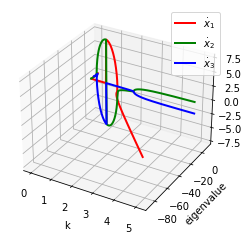

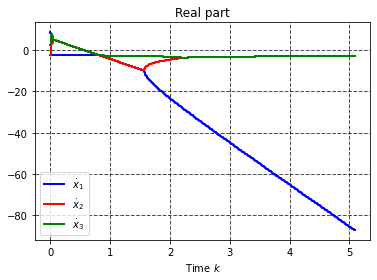

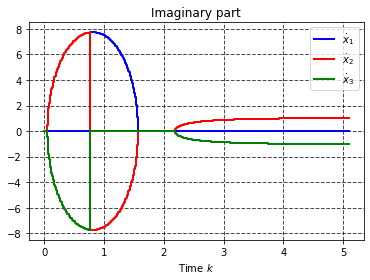

In [ ]:
A = np.array([[1, 5, -2], [2, 1, -3], [-1, -2, 7]])
B = np.array([[2, 1, 0]]).T

evals = np.empty(3)
# print(len(evals))

k0 = 0.0
kf = 5.1
k = np.arange(k0, kf, 0.01)

# print(len(k))

for i in k:
    K = - np.array([7*i, 6*i, -50*i])
    
    K = np.reshape(K, B.T.shape)
    
    Lambda, Q = np.linalg.eig(A + (B @ K))
    evals = np.vstack((evals, Lambda))
    # print(f"With $k={i}$ the eigenvalues are:\n{Lambda}")

evals = np.delete(evals, (0), axis=0)
# print(evals)

ax = axes(projection='3d')
ax.plot3D(k, evals[:,0].real, evals[:,0].imag, linewidth=2.0, color = 'r', label = r"$\dot x_1$")
ax.plot3D(k, evals[:,1].real, evals[:,1].imag, linewidth=2.0, color = 'g', label = r"$\dot x_2$")
ax.plot3D(k, evals[:,2].real, evals[:,2].imag, linewidth=2.0, color = 'b', label = r"$\dot x_3$")
xlabel("k")
ylabel("eigenvalue")
legend()
show()
# zlabel("k")

step(k, evals[:,0].real, linewidth=2.0, color = 'b', label = r"$\dot x_1$")
step(k, evals[:,1].real, linewidth=2.0, color = 'r', label = r"$\dot x_2$")
step(k, evals[:,2].real, linewidth=2.0, color = 'g', label = r"$\dot x_3$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $k$')
title('Real part')
legend()
show()
step(k, evals[:,0].imag, linewidth=2.0, color = 'b', label = r"$\dot x_1$")
step(k, evals[:,1].imag, linewidth=2.0, color = 'r', label = r"$\dot x_2$")
step(k, evals[:,2].imag, linewidth=2.0, color = 'g', label = r"$\dot x_3$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $k$')
title('Imaginary part')

legend()
show()

## Task 2.2

Chose a value of $k$ that allows the system to be stable. Use bode plot to find stability margins of the closed-loop system.

[-2.44449183+0.j         -0.07775409+7.35076975j -0.07775409-7.35076975j]


/home/yy7/.local/lib/python3.9/site-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


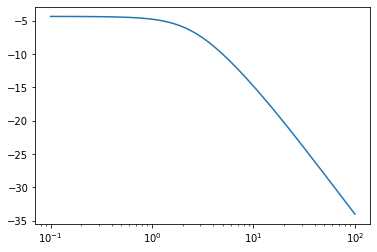

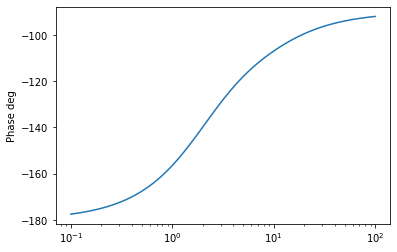

In [ ]:
from scipy import signal
from scipy.signal import ss2tf

goodK = 0
idx = 0

for i in evals:
    cnt = 0
    # print(i)
    for j in i:
        if (j.real < 0):
            cnt = cnt+1
    if (cnt == 3):
        goodK = i
        # knt = knt + 1
        print(goodK)
        break
    idx = idx + 1

# print(idx)
# print(k[idx])

A = np.array([[1, 5, -2], [2, 1, -3], [-1, -2, 7]])
B = np.array([[2], [1], [0]])

C = np.array([[1, 0, 0]])
D = np.array([[0]])

W = ss2tf(A, B, C, D)

sys = signal.TransferFunction(W[0], W[1])

w, mag, phase = signal.bode(sys)

figure()
semilogx(w, mag)    # Bode magnitude plot
figure()

semilogx(w, phase)  # Bode phase plot
# print(mag)
ylabel("Gain dB")
# legend()
# figure()
ylabel("Phase deg")
show()



The corresponding gain is less than $0\text{ dB}$ on the whole domain and at phase crossover frequency, thus the feedback system is stable.

At $k = 0.58$ the eigenvalues are:

- $\lambda_1 = -2.44449183+0.j$
- $\lambda_2 = -0.07775409+7.35076975j$
- $\lambda_3 = -0.07775409-7.35076975j$

         

## Task 2.3

Discretize the closed-loop system with $\Delta t = 0.05$ and simulate both the continues-time and discrete-time versions, show if there is a difference between simulation results.

With $K = -1\times \begin{bmatrix}7 & 6 & -50\end{bmatrix}$ and $x_0 = \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix}$

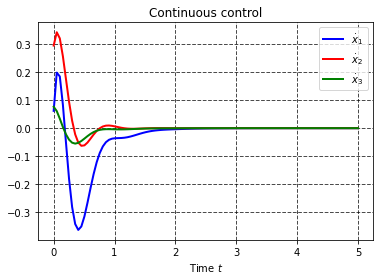

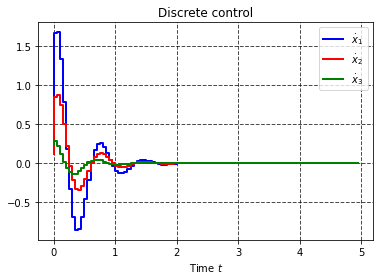

In [ ]:
def StateSpace(x, t, A, B, K):
  return A @ x + B @ K @ x

def my_simulate(A, B, K):
  n = len(B)
  t0 = 0 # Initial time 
  tf = 5 # Final time
  t = np.linspace(t0, tf, 100) 

  x0 = np.random.random(3)

  solution = odeint(StateSpace, x0, t, args=(A,B,K))

  plot(t, solution[:,0], linewidth=2.0, color = 'b', label = r"$\dot x_1$")
  plot(t, solution[:,1], linewidth=2.0, color = 'r', label = r"$\dot x_2$")
  plot(t, solution[:,2], linewidth=2.0, color = 'g', label = r"$\dot x_3$")
  grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  xlabel(r'Time $t$')
  title('Continuous control')
  legend()
  show()


A = np.array([[1, 5, -2], [2, 1, -3], [-1, -2, 7]])
B = np.array([[2], [1], [0]])

C = np.array([[1, 0, 0]])
D = np.array([[0]])

K = - np.array([[7*1, 6*1, -50*1]])

my_simulate(A, B, K)

T = 0.05
t0 = 0
tf = 5
t = np.arange(t0, tf, T)

A_d = T * A + np.eye(3)
B_d = T * B

x_d = np.random.random(3)
x_disc = x_d
# x_d = np.reshape(x_d, B.shape)


for time in t:
  u_d = K @ x_d
  x_d = A_d @ x_d + np.dot(B_d,u_d)
  # print(f"x_d = {x_d}")
  x_disc = np.vstack((x_disc, x_d))

# print(len(x_disc))

y_disc, dy_disc = x_disc[:,0], x_disc[:,1] 
t_disc = np.insert(t, 0, 0)

step(t_disc, x_disc[:,0], linewidth=2.0, color = 'b', label = r"$\dot x_1$")
step(t_disc, x_disc[:,1], linewidth=2.0, color = 'r', label = r"$\dot x_2$")
step(t_disc, x_disc[:,2], linewidth=2.0, color = 'g', label = r"$\dot x_3$")
# step(t_disc, x_disc[:,3], linewidth=2.0, color = 'c', label = r"$\dot x_4$")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlabel(r'Time $t$')
title('Discrete control')
legend()
show()

## Task 2.4

What is the smallest value of $k$ that makes the eigenvalues purely real?

<!-- $$
A = 
$$
$$
B = 
$$
$$
K = 
$$

$$\det(A - BK - \lambda I) = 0$$
$$
\det 
\begin{pmatrix}
1 - 14k - \lambda & 5-6k & -2 \\
2-14k & 1-6k-\lambda & -3 \\
-1-14k & 1-6k & 7-\lambda
\end{pmatrix}
=0
$$

$$-\lambda^3 + (9-20k)\lambda^2 + (-6+124k)\lambda + 602k - 51 = 0$$

$$\lambda = \left(q+\left[q^2+\left(r-p^2\right)^3\right]^{1/2}\right)^{1/3} + \left(q - \left[q^2+\left(r-p^2\right)^3\right]^{1/2}\right)^{1/3}+p$$

$$p = \frac{-b}{3a} = \frac{9-20k}{3}$$
$$q = p^3 + \frac{bc-3ad}{6a^2} = \left(\frac{9-20k}{3}\right)^3 + \frac{(9-20k)(-6+124k) + 3(602k - 51)}{6}$$
$$r = \frac{c}{3a} = \frac{6-124k}{3}$$ -->

Let us solve this numerically using complete search with a step width of $10^{-5}$



In [ ]:
A = np.array([[1, 5, -2], [2, 1, -3], [-1, -2, 7]])
B = np.array([[2, 1, 0]]).T

k0 = 0.0
kf = 5
k = np.arange(k0, kf, 0.00001)

for i in k:
    K = - np.array([7*i, 6*i, -50*i])
    
    K = np.reshape(K, B.T.shape)
    
    Lambda, Q = np.linalg.eig(A + (B @ K))
    
    cnt = 0
    for val in Lambda:
        if(val.real < 0 and val.imag == 0):
            cnt = cnt + 1
    
    if(cnt == 3):
        print(i)
        break


1.57735


The smallest non-negative value of $k$ is located in the neighborhood $(1.57735 - \varepsilon;\ 1.57735 + \varepsilon)$, where $\varepsilon = 10^{-5}$.

# Task 3

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 1 \\
1 & 10
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
1
\end{bmatrix}
u \\
u = 
-\begin{bmatrix} 
5k & k
\end{bmatrix} x
\end{cases}
$$

You can chose any positive value of $k$ to design your controller. What is least-norm control gain (control gain is the matrix $\begin{bmatrix} 5k & k \end{bmatrix}$) that makes the system not only be stable, but also exhibit no oscillations in the transient process?

The transient process will exhibit no oscillation in the case when the system has purely real eigenvalues.

37.2047


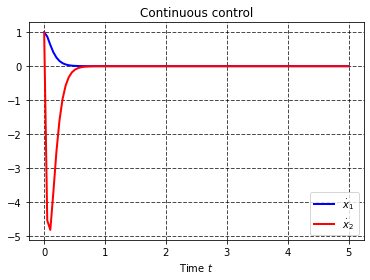

In [ ]:
def StateSpace(x, t, A, B, K):
  return A @ x + B @ K @ x

def my_simulate(A, B, K):
  n = len(B)
  t0 = 0 # Initial time 
  tf = 5 # Final time
  t = np.linspace(t0, tf, 100) 

  x0 = np.ones(n)

  solution = odeint(StateSpace, x0, t, args=(A,B,K))

  plot(t, solution[:,0], linewidth=2.0, color = 'b', label = r"$\dot x_1$")
  plot(t, solution[:,1], linewidth=2.0, color = 'r', label = r"$\dot x_2$")
  grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  xlabel(r'Time $t$')
  title('Continuous control')
  legend()
  show()

A = np.array([[0,1],[1,10]])
B = np.array([[0],[1]])
C = np.array([[1, 1]])
D = np.array([[0]])

k0 = 0.0
kf = 50
k = np.arange(k0, kf, 0.0001)

K =  np.array([[0, 0]])

for i in k:
    K = - i * np.array([[5, 1]])
    
    K = np.reshape(K, B.T.shape)
    
    Lambda, Q = np.linalg.eig(A + (B @ K))

    cnt = 0
    for val in Lambda:
        if(val.real < 0 and val.imag == 0):
            cnt = cnt + 1
    
    if(cnt == 2):
        print(i)
        break

my_simulate(A, B, K)

The smallest non-negative value of $k$ is located in the neighborhood $(37.20466 - \varepsilon;\ 37.20466 + \varepsilon)$, where $\varepsilon = 10^{-5}$.